# Generate standard comparison metrics

These are a set of standard kinematics for comparing models and data.

- Mean energy binned along;
    * Radius from shower axis
    * layer
- Number of cells binned along visible cell energy
- Number of showers binned along
    * center of gravity in x
    * center of gravity in y (detector coords)
    * center of gravity in z (detector coords)
    * number of hits
    * energy sum

Lining up these distributions with geant 4 shows good simulation behaviour.

## Start with imports and config


In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from pointcloud.config_varients.wish_maxwell import Configs as MaxwellConfigs
from pointcloud.configs import Configs
from pointcloud.evaluation.bin_standard_metrics import (
    BinnedData,
    DetectorBinnedData,
    get_path,
)

config = Configs()

## Histogramming

BinnedData is a class that takes sets of points and accumulates them for each of the binnings we are intrested in.
This class, and related uitilites are in `pointclouds/evaluation/bin_standard_metrics.py`.
We have preped and generated data in this class using `scripts/create_standard_metrics.py`.



## Data as BinnedData

For Geant 4, the accumulator and each of the models, load the generate binned data

Geant 4 is our ground truth, so it gets special treatment.

In [2]:
g4_name = "Geant 4"


def get_path_or_ref(config, name):
    """
    Get a path to the binned data from the logdir in the config,
    or if not found, check the reference folder.
    """
    ref_dir = "standard_metrics_ref"
    try:
        save_path = get_path(config, name)
    except FileNotFoundError:
        save_path = ""
    if not os.path.exists(save_path):
        print(f"Didn't find binned data for {name} in {save_path}")
        ref_path = os.path.join(ref_dir, name.replace(" ", "_") + ".npz")
        print(f"Checking for stored reference in {ref_dir}")
        if os.path.exists(ref_path):
            print(f"Found stored reference")
            save_path = ref_path
    return save_path


# g4_save_path = get_path_or_ref(config, g4_name)

# if not g4_save_path:
#    print(f"Can't load g4 bins, recreate with create_standard_metrics.py or this doesn't really work...")

detector_proj = False
# for p22
g4_save_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Geant_4.npz"
# for calochallange
g4_save_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/Geant_4.npz"
g4_save_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/Geant_4.npz"
g4_save_path = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/Geant_4_p22_th90_ph90_en10-100_noFactor.npz"
g4_save_path_proj = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/Geant_4_p22_th90_ph90_en10-100_detectorProj.npz"
g4_save_path_sim = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/Geant_4_sim-E1261AT600AP180-180.npz"

binned_g4_proj = DetectorBinnedData.load(g4_save_path_proj)
binned_g4 = BinnedData.load(g4_save_path)
binned_g4_sim = BinnedData.load(g4_save_path_sim)

100%|██████████| 30/30 [00:00<00:00, 5778.87it/s]


In [3]:
# Name all the models that we might have binned data for
# for p22
save_paths = {
    "CaloClouds Duncan gen0": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/CaloClouds3_DuncanGen0.npz",
    "CaloClouds changed loss 2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Caloclouds_gunHenry3.npz",
    "CaloClouds changed loss 3": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_p22/Caloclouds_gunHenry4.npz",
}
# for calochallange
save_paths = {
    "CaloClouds Duncan gen0": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/CaloClouds3_DuncanGen0.npz",
    "CaloClouds changed loss 3": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics_10-90GeV/Calochallangecaloclouds.npz",
}
# for anatolii

save_paths = {
    "CaloClouds previous": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/CaloClouds_unchanged.npz",
    "CaloClouds changed loss 3": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation2/binned_metrics/CaloClouds_changed_loss_3.npz",
}
# without projection
save_paths = {
    #"CC2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100.npz",
    "CC2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_noFactor.npz",
    "CC3": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_noFactor.npz",
}
save_paths_proj = {
    "CC2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_detectorProj.npz",
    "CC3": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_detectorProj.npz",
    #"CC2 shift2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/shift2/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_detectorProj.npz",
    #"CC3 shift2": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/shift2/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_detectorProj.npz",
   # "CC2 no factor": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_noFactor_detectorProj.npz",
   # "CC2 no factor, true Npts": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_noFactor_detectorProj_trueNPts.npz",
    #"CC3 no factor": "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_noFactor_detectorProj.npz",
}
# projected into detector
if detector_proj:
    save_paths = save_paths_proj
# model_names += [f"Wish-poly{poly_degree}" for poly_degree in range(1, 4)]
config.logdir = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/investigation"

to_compare = {}
for model_name, save_path in save_paths.items():
    # save_path = get_path_or_ref(config, model_name)
    # save_path = "/beegfs/desy/user/weberdun/6_PointCloudDiffusion/log/binned_metrics/CaloClouds_Duncan_gen0.npz"
    if not save_path:
        print(
            f"Can't load {model_name}, recreate with create_standard_metrics.py if required"
        )
        continue
    print(save_path)
    if "detectorProj" in save_path:
        binned = DetectorBinnedData.load(save_path)
    else:
        binned = BinnedData.load(save_path)
    to_compare[model_name] = binned

to_compare_proj = {}

for model_name, save_path in save_paths_proj.items():
    # save_path = get_path_or_ref(config, model_name)
    # save_path = "/beegfs/desy/user/weberdun/6_PointCloudDiffusion/log/binned_metrics/CaloClouds_Duncan_gen0.npz"
    if not save_path:
        print(
            f"Can't load {model_name}, recreate with create_standard_metrics.py if required"
        )
        continue
    print(save_path)
    if "detectorProj" in save_path:
        binned = DetectorBinnedData.load(save_path)
    else:
        binned = BinnedData.load(save_path)
    to_compare_proj[model_name] = binned

# to_compare["G4 angular"] = binned_g4_sim
print(to_compare["CC2"])
print(binned_g4)

/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_noFactor.npz
/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_noFactor.npz
/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_detectorProj.npz


100%|██████████| 30/30 [00:00<00:00, 1862.95it/s]


/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_detectorProj.npz


100%|██████████| 30/30 [00:00<00:00, 1886.92it/s]

radius [mm] v.s. sum clusters;                               (0.00, 500.00),                32012679.0
radius [mm] v.s. sum energy [MeV];                           (0.00, 500.00),                11169409.731238374
layers v.s. sum clusters;                                    (1.00, 30.00),                 32012679.0
layers v.s. sum energy [MeV];                                (1.00, 30.00),                 11169409.731238373
cluster energy [MeV] v.s. number of clusters;                (0.00, 100.00),                31904152.0
number of clusters v.s. number of showers;                   (0.00, 10000.00),              10000.0
energy sum [MeV] v.s. number of showers;                     (0.00, 10000.00),              10000.0
center of gravity X [mm] v.s. number of showers;             (-200.00, 200.00),             10000.0
center of gravity Y [mm] v.s. number of showers;             (-160.00, 240.00),             10000.0
center of gravity Z [layer] v.s. number of showers;          (0.00, 3

For only some of the distributions, we can also get data from the StatsAccumulator to compare;

## Plotting

Now the samples have been generated, we can focus on histogramming them.
This may require some manual adjustment to cater for the ranges in which there are significant number of counts.

In [4]:
# name, binned = list(to_compare.items())[0]
import matplotlib
def make_sample_plots(
    data=None,
    check_names=["CC2", "g4", "CC3"],
    sharex=True,
    sharey=False,
    detector_proj=detector_proj,
    sample_event=0,
):

    if data is None:
        data = dict(to_compare)
        data["g4"] = binned_g4
    
    fig, axarr = plt.subplots(len(check_names), 4, figsize=(15, 3*len(check_names)), sharex=sharex, sharey=sharey)
    if len(check_names) == 1:
        axarr = [axarr]
    for row, name in enumerate(check_names):
        ax_row = axarr[row]
        binned = data[name]
        radial_center = (binned.gun_shift + binned.event_center)[0][0]
        if detector_proj:
            sample_events = binned.raw_sample_events
        else:
            sample_events = binned.sample_events
        xs = sample_events[:, :, 0]
        ys = sample_events[:, :, 1]
        zs = sample_events[:, :, 2]
        es = sample_events[:, :, 3]
        #if detector_proj:
        #    xs, ys, zs = zs, xs, ys

        ax = ax_row[2]
        mask = es>0
        ax.hist2d(xs[mask], zs[mask], weights=es[mask], norm=matplotlib.colors.LogNorm(), bins=50)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax = ax_row[3]
        ax.hist2d(xs[mask], ys[mask], weights=es[mask],  norm=matplotlib.colors.LogNorm(), bins=50)
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.vlines([radial_center[0]], -100, 100, color='red')
        ax.hlines([radial_center[1]], -100, 100, color='red')
        
        mask = es[0] > 0
        ax = ax_row[1]
        ax.scatter(xs[0][mask], zs[0][mask], c=np.log(es[0][mask]), alpha=0.5, lw=0, s=1)
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        zmin, zmax = np.min(zs[0][mask]), np.max(zs[0][mask])
        ax.vlines([radial_center[0]], zmin, zmax, color='red')
        ax = ax_row[0]
        ax.scatter(ys[0][mask], zs[0][mask], c=np.log(es[0][mask]), alpha=0.5, lw=0, s=1)
        ax.set_xlabel("y")
        ax.set_ylabel("z")
        ax.vlines([radial_center[1]], zmin, zmax, color='red')

        ax_row[0].set_ylabel(name)



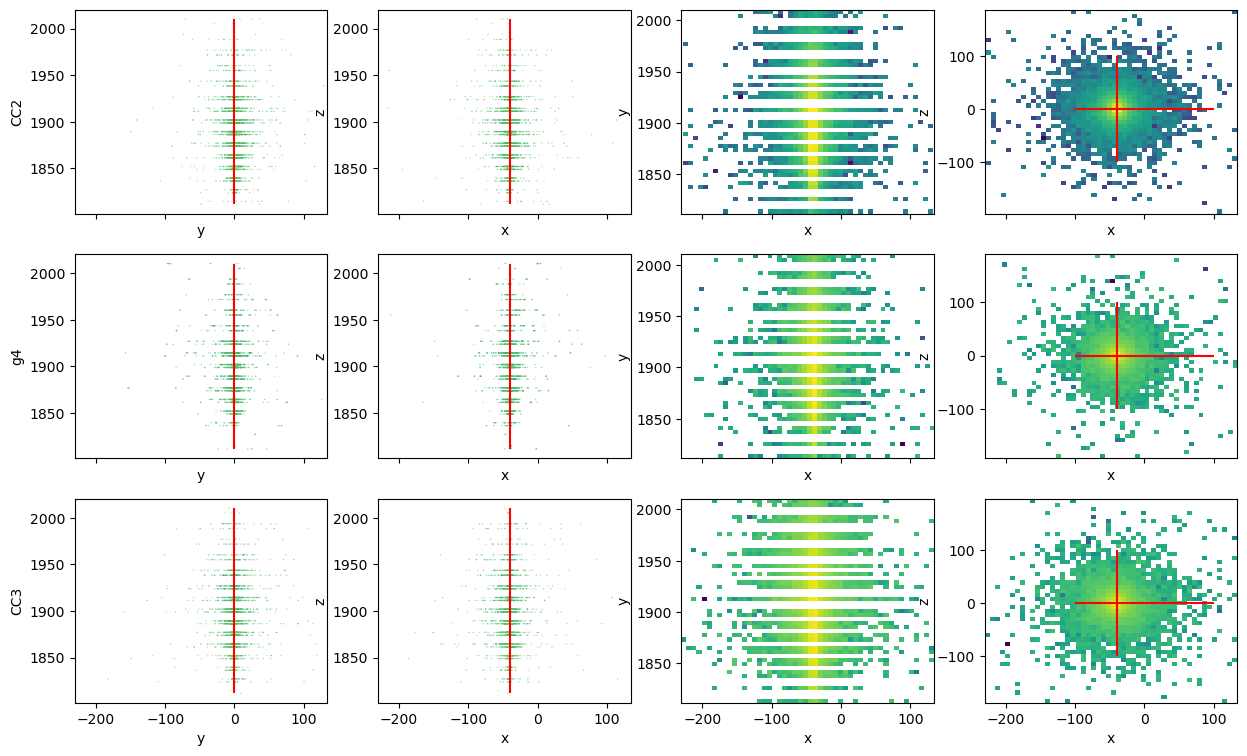

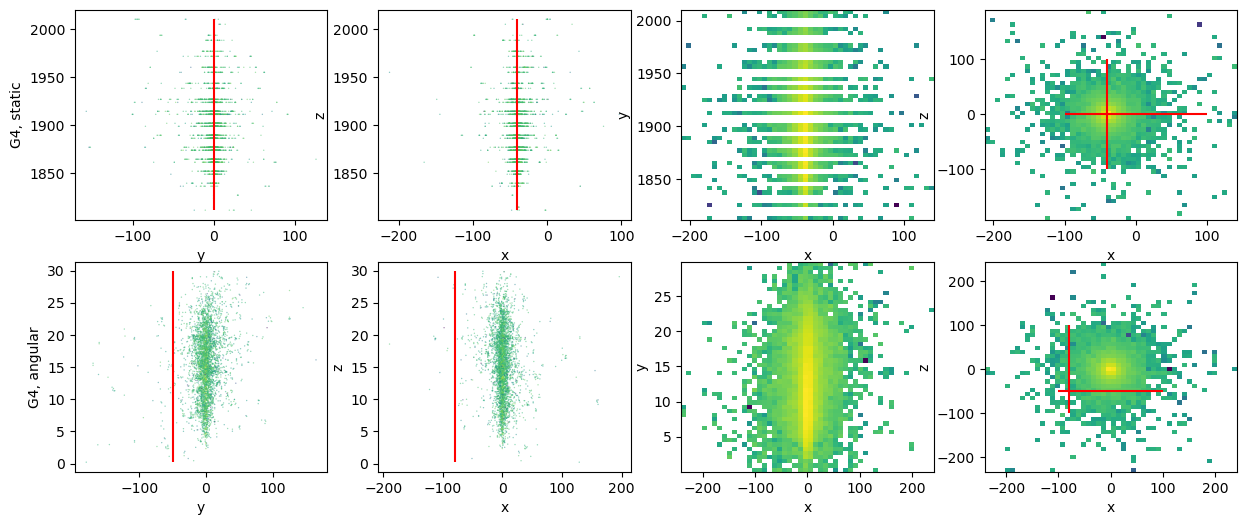

In [5]:

make_sample_plots()

binned_g4_dict = {"G4, static": binned_g4, "G4, angular": binned_g4_sim}

make_sample_plots(binned_g4_dict, binned_g4_dict.keys(), False, False)

In [6]:
# name, binned = list(to_compare.items())[0]
import matplotlib
def make_sample_proj_plots(
    data=None,
    check_names=["CC2", "g4", "CC3"],
    sharex=True,
    sharey=False,
    detector_proj=detector_proj,
    sample_event=0,
):

    if data is None:
        data = dict(to_compare)
        data["g4"] = binned_g4
    
    fig, axarr = plt.subplots(len(check_names), 4, figsize=(15, 3*len(check_names)), sharex=sharex, sharey=sharey)
    if len(check_names) == 1:
        axarr = [axarr]
    for row, name in enumerate(check_names):
        view_slice = 15
        
        ax_row = axarr[row]
        ax_row[0].set_ylabel(name)
        binned = data[name]
        sample_projections = binned.sample_projections
        cell_radii = binned.radial_cell_allocations
        radial_center = (binned.gun_shift + binned.event_center)[0][0]
        
        # Plot the Nth layer from the first event
        ax = ax_row[0]
        cell_radii_N = cell_radii[view_slice]
        mask = cell_radii_N == np.min(cell_radii_N)
        middle_layer = np.copy(sample_projections[sample_event][view_slice])
        middle_layer[mask] = 100
        ax.matshow(middle_layer, norm=matplotlib.colors.LogNorm())

        # Plot the center slice of all layers from the first event
        ax = ax_row[1]
        slice_at = middle_layer.shape[0]//2
        slice_at = 30
        evt_0_slice = [p[slice_at, :] for p in sample_projections[sample_event]]
        min_slice_len = np.min([s.shape[0] for s in evt_0_slice])
        evt_0_slice = np.array([s[:min_slice_len] for s in evt_0_slice])
        ax.matshow(evt_0_slice, norm=matplotlib.colors.LogNorm())

        # Plot the mean of all layer N
        ax = ax_row[2]
        mean_middle_layer = np.mean([p[view_slice] for p in sample_projections], axis=0)
        mean_middle_layer[mask] = 100
        ax.matshow(mean_middle_layer, norm=matplotlib.colors.LogNorm())

        # Plot the mean of all center slices
        ax = ax_row[3]
        mean_slice = np.array([np.mean([s[l][slice_at, :min_slice_len] for s in sample_projections], axis=0)
                               for l in range(len(evt_0_slice))])
        ax.matshow(mean_slice, norm=matplotlib.colors.LogNorm())
        

    
        



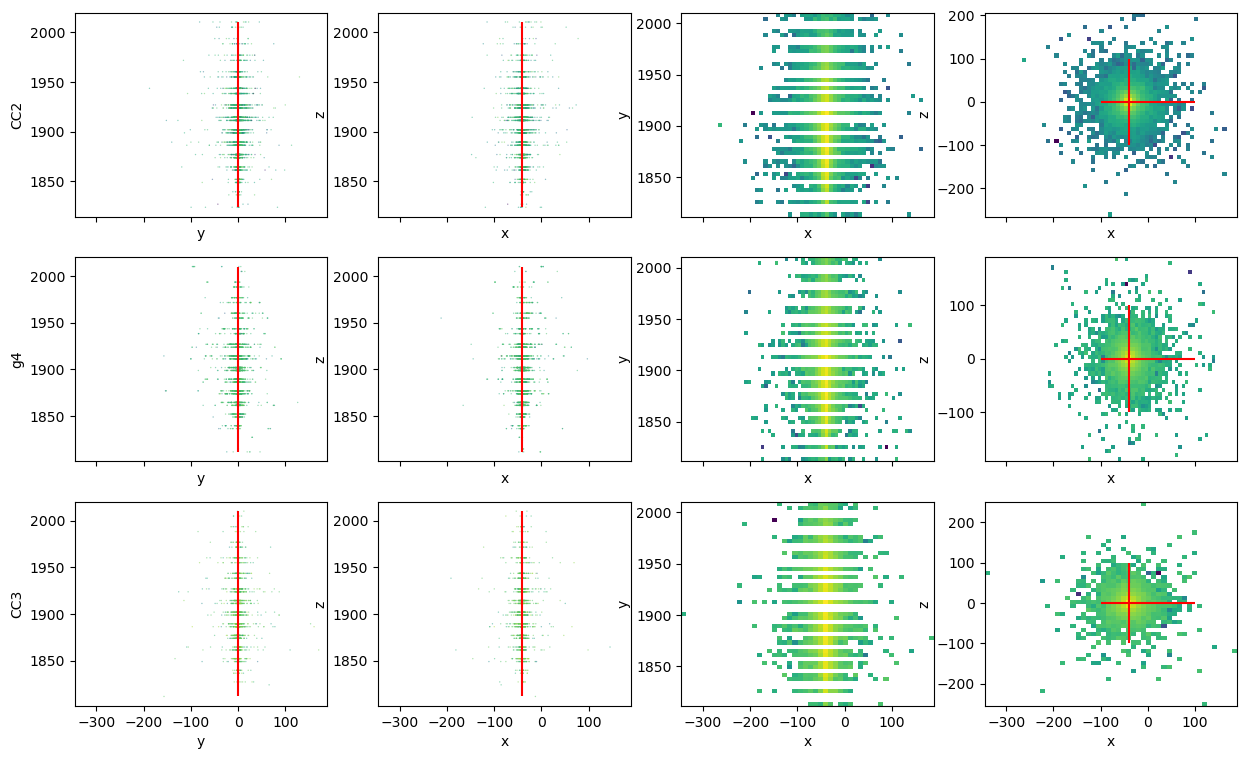

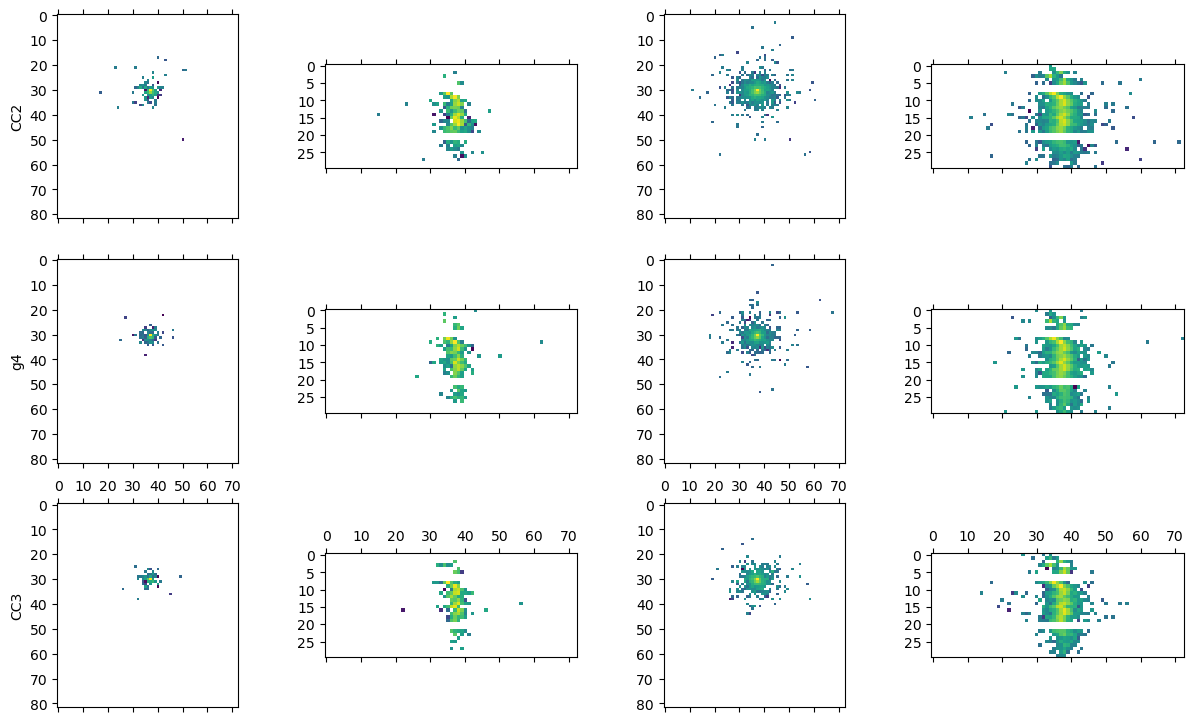

In [7]:
data = dict(to_compare_proj)
data["g4"] = binned_g4_proj

make_sample_plots(data, detector_proj=True)
make_sample_proj_plots(data, detector_proj=True)


('radius [mm]', 'sum clusters')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [layer]', 'number of showers')
center of gravity Z [layer], nan
Axis limits cannot be NaN or Inf
('layers', 'sum clusters')
('cluster energy [MeV]', 'number of clusters')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy [MeV]')
('number of clusters', 'number of showers')
('energy sum [MeV]', 'number of showers')
('radius [mm]', 'sum clusters')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [layer]', 'number of showers')
center of gravity Z [layer], nan
Axis limits cannot be NaN or Inf
('layers', 'sum clusters')
('cluster energy [MeV]', 'number of clusters')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy 

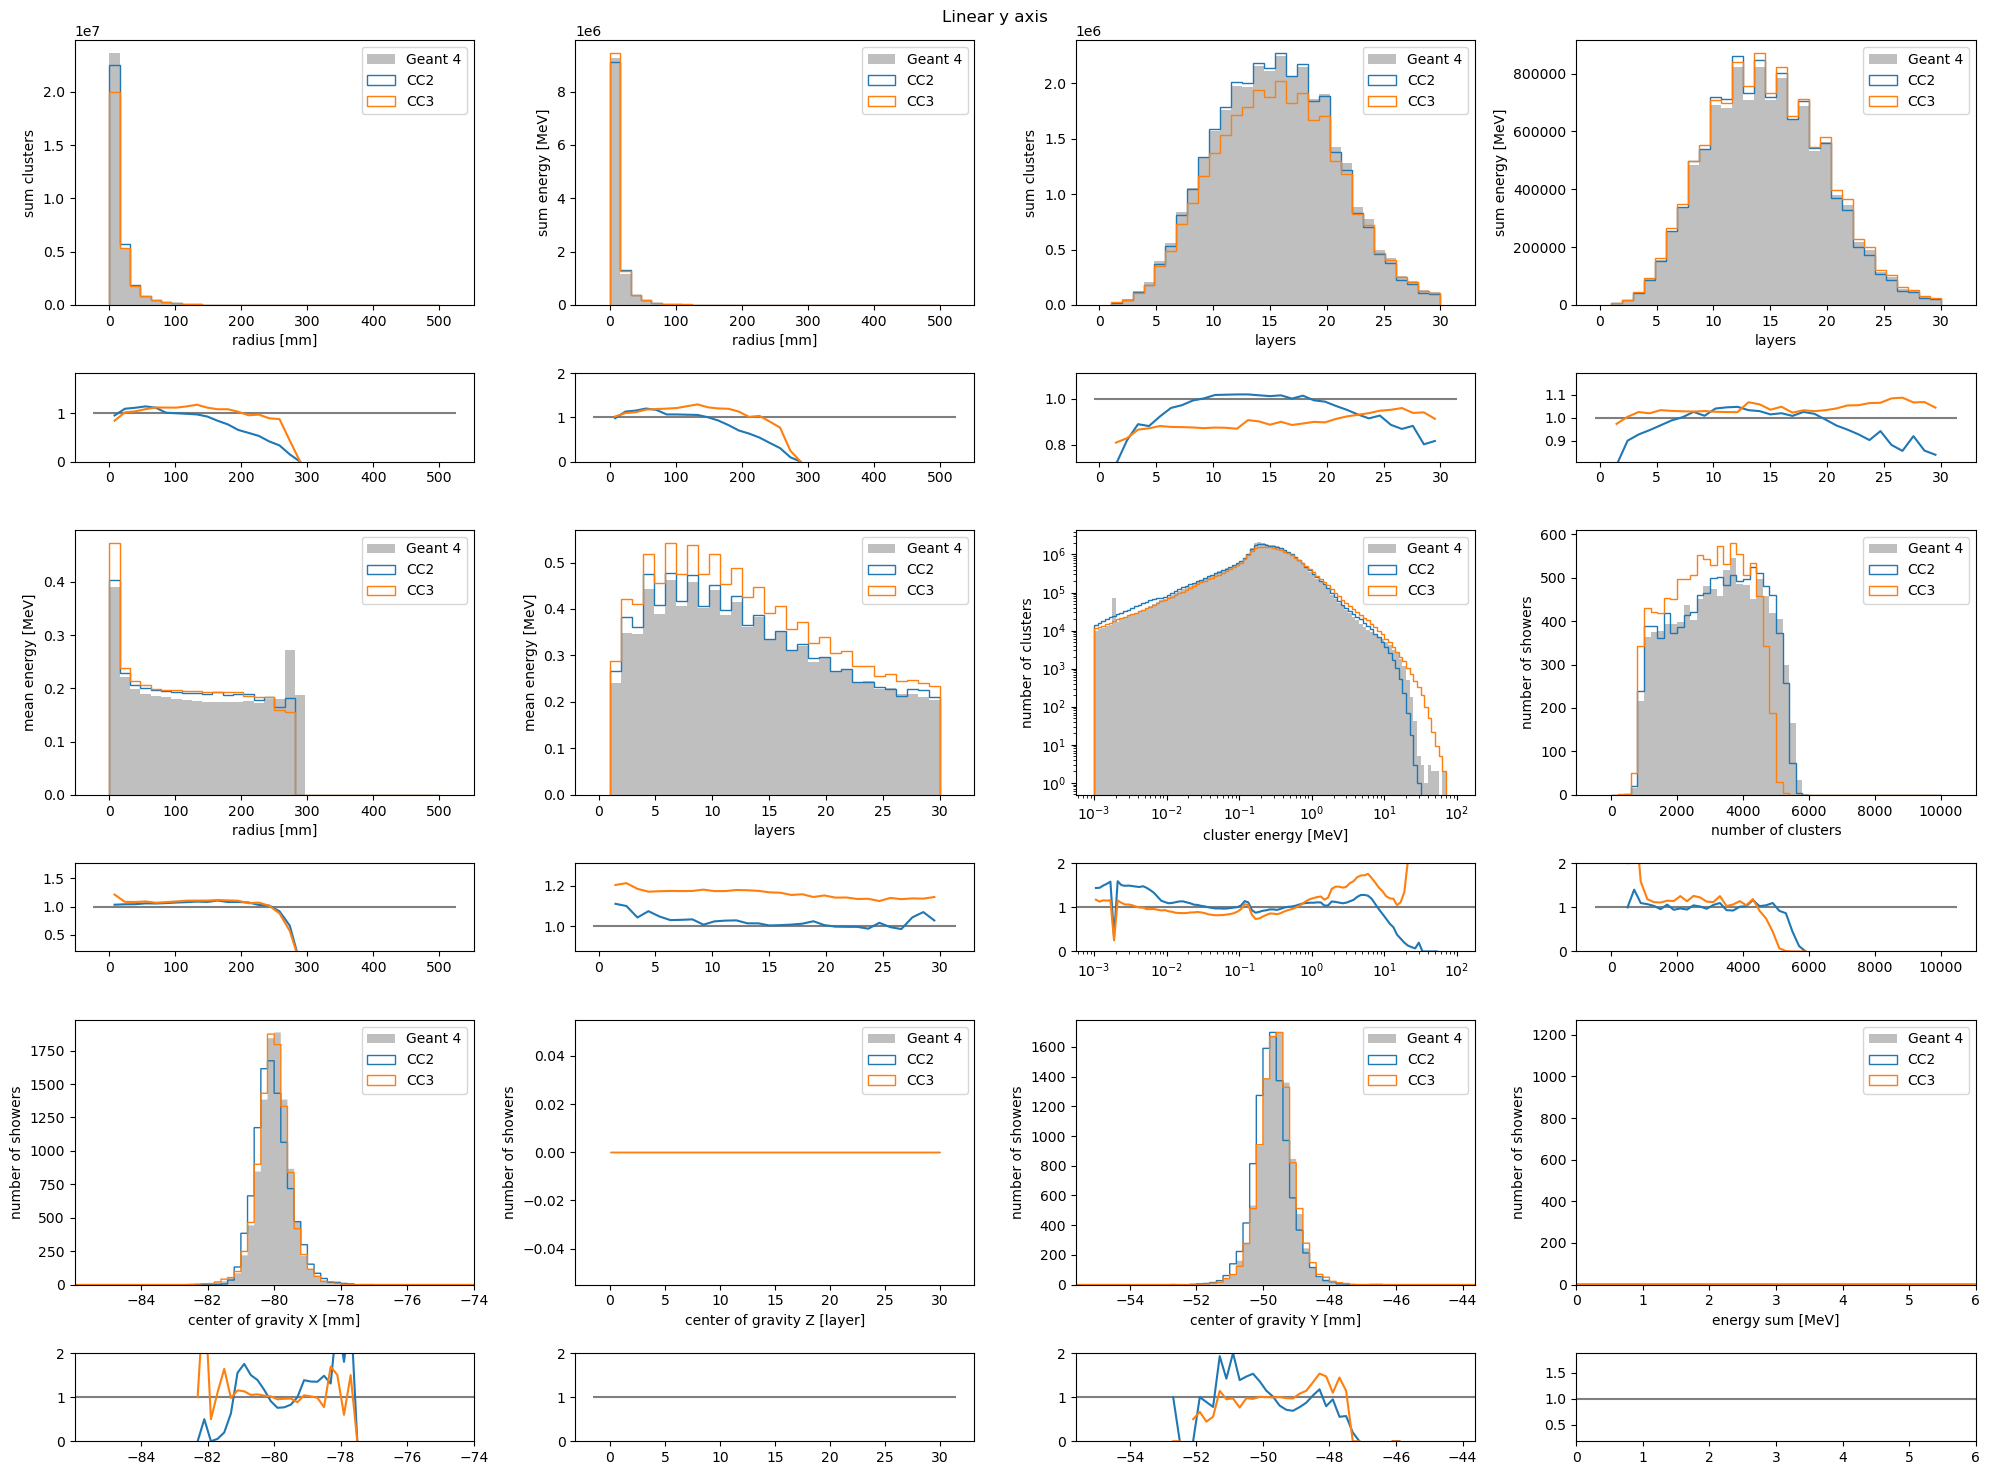

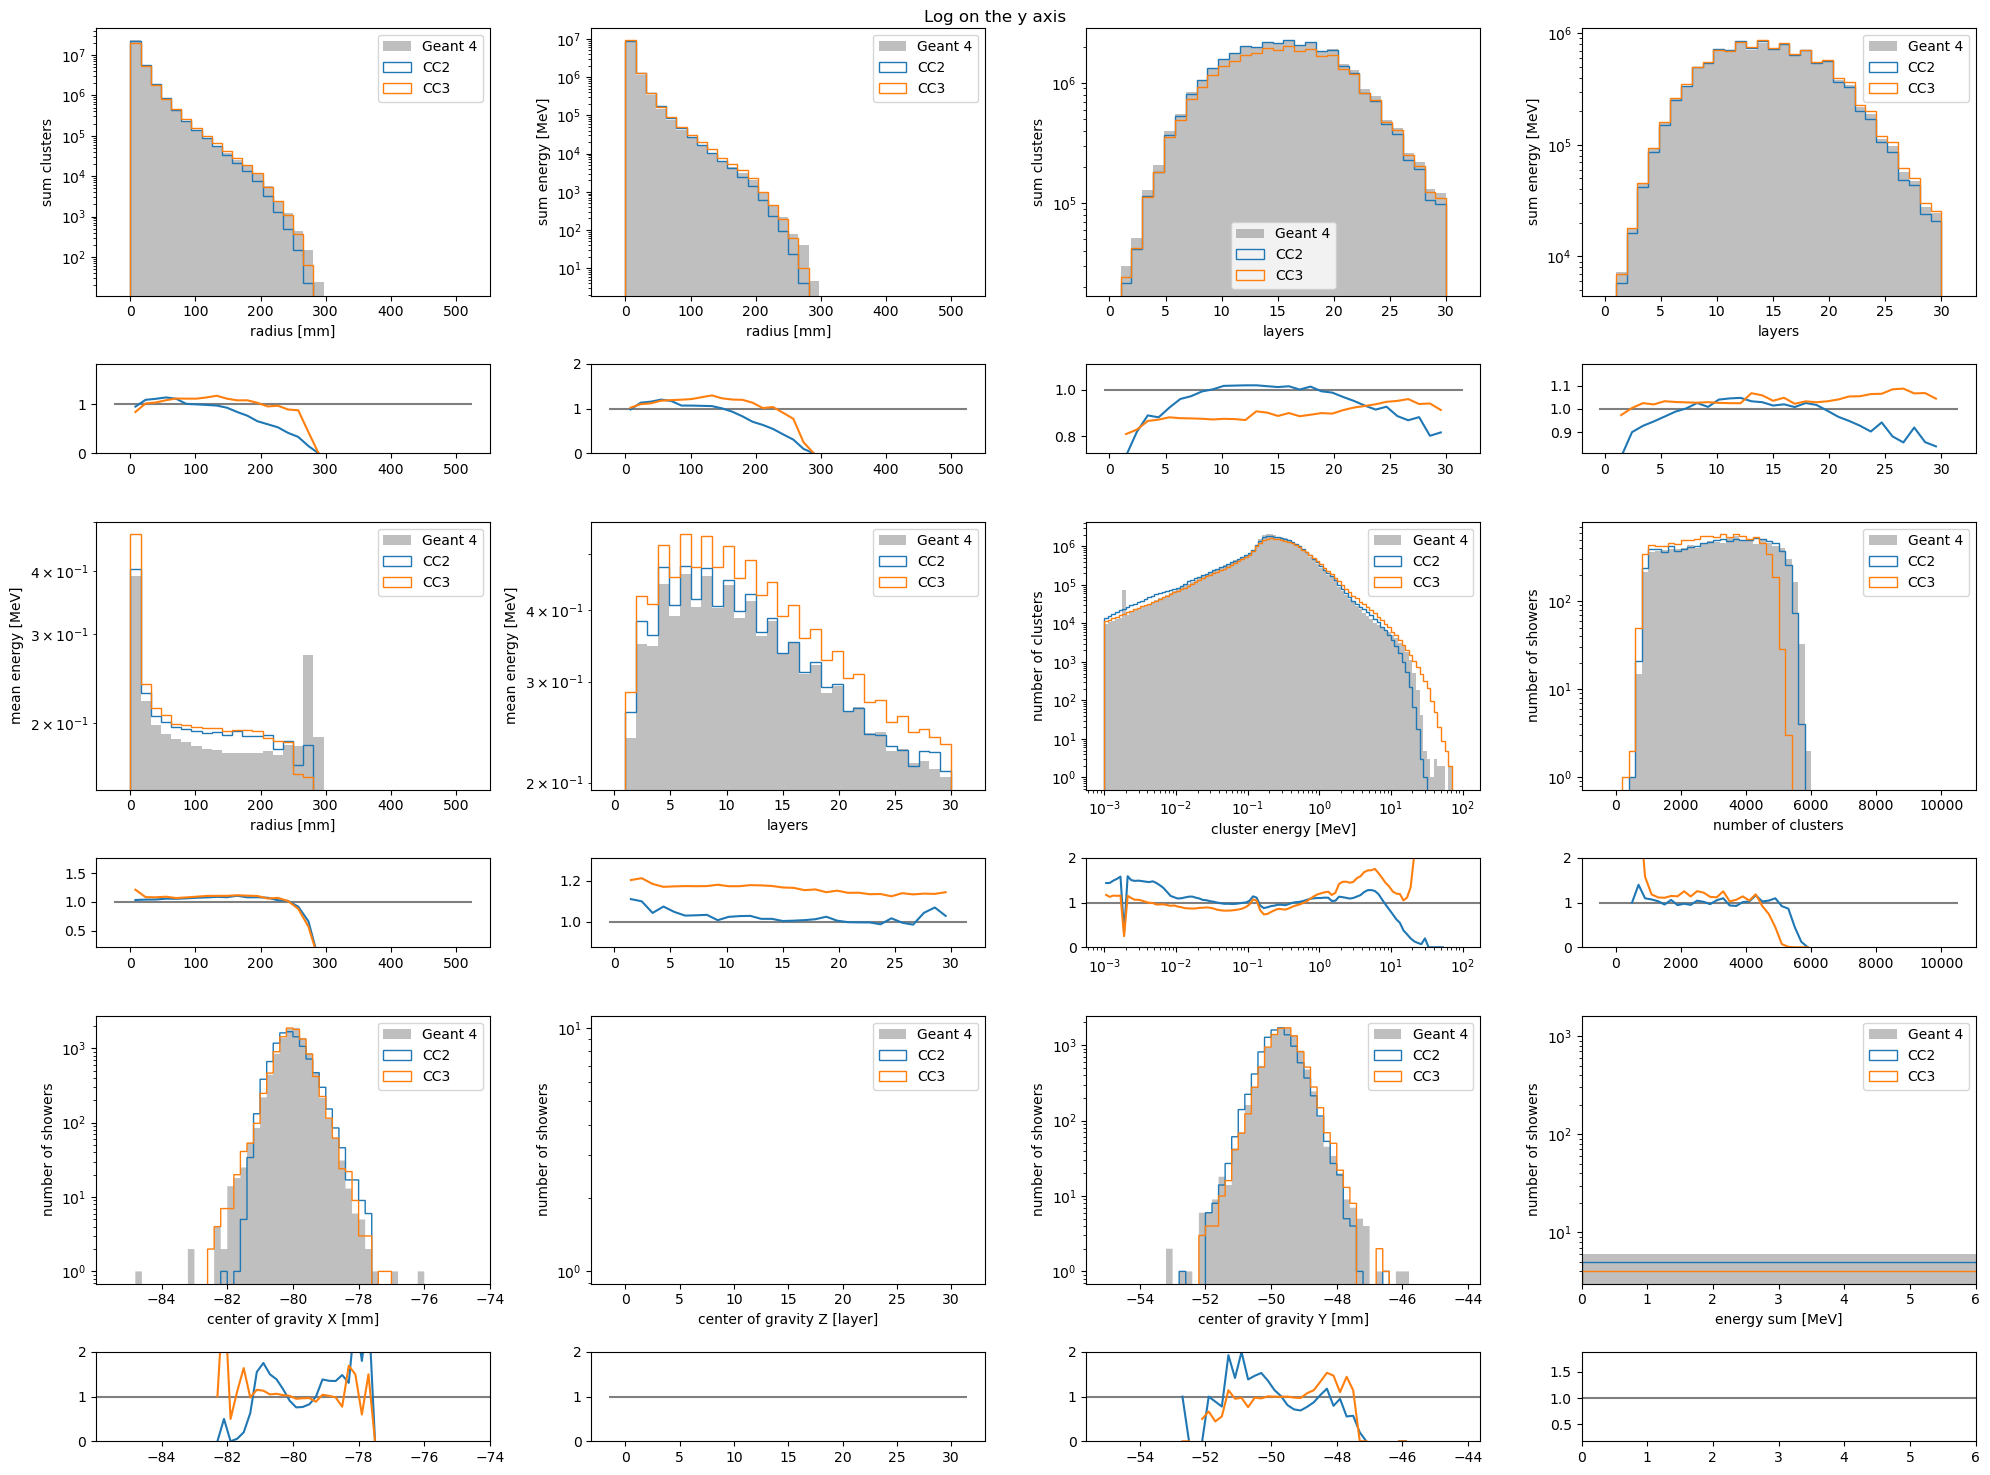

In [8]:
def make_hist_plots(binned_g4=binned_g4, to_compare=to_compare, save_tag=None):

    hist_idx_order = [0, 10, 7, 1, 11, 9, 2, 4, 8, 3, 5, 6]

    n_plts = len(hist_idx_order)
    n_rows = int(n_plts / 4)
    height_ratios = [3, 1] * n_rows

    for semilogy in [False, True]:

        fig, ax_arr = plt.subplots(
            2 * n_rows,
            4,
            figsize=(20, 5 * n_rows),
            gridspec_kw={"height_ratios": height_ratios},
        )
        ax_arr = ax_arr.T.flatten()

        if semilogy:
            fig.suptitle("Log on the y axis")
        else:
            fig.suptitle("Linear y axis")

        model_colours = [plt.cm.tab10(i / 10) for i in range(len(to_compare))]

        for i, hist_idx in enumerate(hist_idx_order):

            main_ax = ax_arr[2 * i]
            ratio_ax = ax_arr[2 * i + 1]
            ratio_ax.sharex(main_ax)

            x_label = binned_g4.x_labels[hist_idx]
            main_ax.set_xlabel(x_label)
            main_ax.set_ylabel(binned_g4.y_labels[hist_idx])
            print((x_label, binned_g4.y_labels[hist_idx]))
            if semilogy:
                main_ax.semilogy()

            # G4
            dummy_values = binned_g4.dummy_xs(hist_idx)
            weights = binned_g4.counts[hist_idx]
            # weights = binned_g4.normed(hist_idx)
            bins = binned_g4.bins[hist_idx]
            main_ax.hist(
                dummy_values,
                bins=bins,
                weights=weights,
                label=binned_g4.name,
                histtype="stepfilled",
                color="grey",
                alpha=0.5,
            )

            # print(f"Sum g4 weights {np.sum(weights)}")

            # Fix some axes
            if "center of gravity" in x_label:
                center_pos = np.nansum(dummy_values * weights) / np.nansum(weights)
                if "Z" in x_label:
                    half_width = 15
                else:
                    half_width = 6
                try:
                    main_ax.set_xlim(center_pos - half_width, center_pos + half_width)
                    pass
                except ValueError as e:
                    print(f"{x_label}, {center_pos}")
                    print(e)
            if "cluster energy" in x_label or "cell energy" in x_label:
                main_ax.loglog()
            if "energy sum" in x_label:
                main_ax.set_xlim(0, 6)
            if "number of active cells" in x_label:
                main_ax.set_xlim(0, 2200)

            xmin, xmax = main_ax.get_xlim()
            ratio_ax.hlines([1], xmin, xmax, color='k', alpha=0.5)

            ratios = []
            # models
            for colour, model_name in zip(model_colours, to_compare):
                model = to_compare[model_name]
                # bins and dummys should be the same
                model_weights = model.counts[hist_idx]
                # model_weights = model.normed(hist_idx)
                # print(model_weights)

                # print(f"Sum {model_name} weights {np.sum(model_weights):.2g}")
                if "rad" in x_label:
                    n_bins_here = min(len(model_weights), len(dummy_values))
                    model_weights = model_weights[:n_bins_here]
                    dummy_values_here = dummy_values[:n_bins_here]
                    bins_here = bins[: n_bins_here + 1]
                else:
                    n_bins_here = len(model_weights)
                    bins_here = bins
                    dummy_values_here = dummy_values

                main_ax.hist(
                    dummy_values_here,
                    bins=bins_here,
                    weights=model_weights,
                    label=model_name,
                    histtype="step",
                    color=colour,
                )
                # main_ax.plot(dummy_values, model_weights, label=f"{np.sum(model_weights):.2g}")

                # and the ratio
                ratio = model_weights / weights[:n_bins_here]
                ratio_ax.plot(dummy_values_here, ratio, c=colour, label=model_name)
                ratios.append(ratio)

            all_ratios = np.concatenate(ratios)
            all_ratios = all_ratios[np.isfinite(all_ratios)]
            mean_ratio = np.nanmean(all_ratios)
            std_ratio = np.nanstd(all_ratios)
            lower_bound = max(0, mean_ratio - 3 * std_ratio)
            upper_bound = min(2, mean_ratio + 3 * std_ratio)

            ratio_ax.set_ylim(lower_bound, upper_bound)

            main_ax.legend()

        fig.tight_layout()
        if semilogy:
            text_ = "log_y"
        else:
            text_ = "linear_y"
        if save_tag is not None:
            fig.savefig(
                f"/data/dust/user/dayhallh/point-cloud-diffusion-images/CC2_vs_3_binned_metrics/compare_{save_tag}_{text_}.png",
                dpi=300,
                bbox_inches="tight",
            )
            fig.savefig(
                f"/data/dust/user/dayhallh/point-cloud-diffusion-images/CC2_vs_3_binned_metrics/compare_{save_tag}_{text_}.pdf",
                dpi=300,
                bbox_inches="tight",
            )


make_hist_plots(save_tag="clusters")

('radius [mm]', 'sum active cells')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [layer]', 'number of showers')
('layers', 'sum active cells')
('cell energy [MeV]', 'number of cells')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy [MeV]')
('number of active cells', 'number of showers')
('energy sum [MeV]', 'number of showers')
('radius [mm]', 'sum active cells')
('radius [mm]', 'mean energy [MeV]')
('center of gravity X [mm]', 'number of showers')
('radius [mm]', 'sum energy [MeV]')
('layers', 'mean energy [MeV]')
('center of gravity Z [layer]', 'number of showers')
('layers', 'sum active cells')
('cell energy [MeV]', 'number of cells')
('center of gravity Y [mm]', 'number of showers')
('layers', 'sum energy [MeV]')
('number of active cells', 'number of showers')
('energy sum [MeV]', 'number of showers')


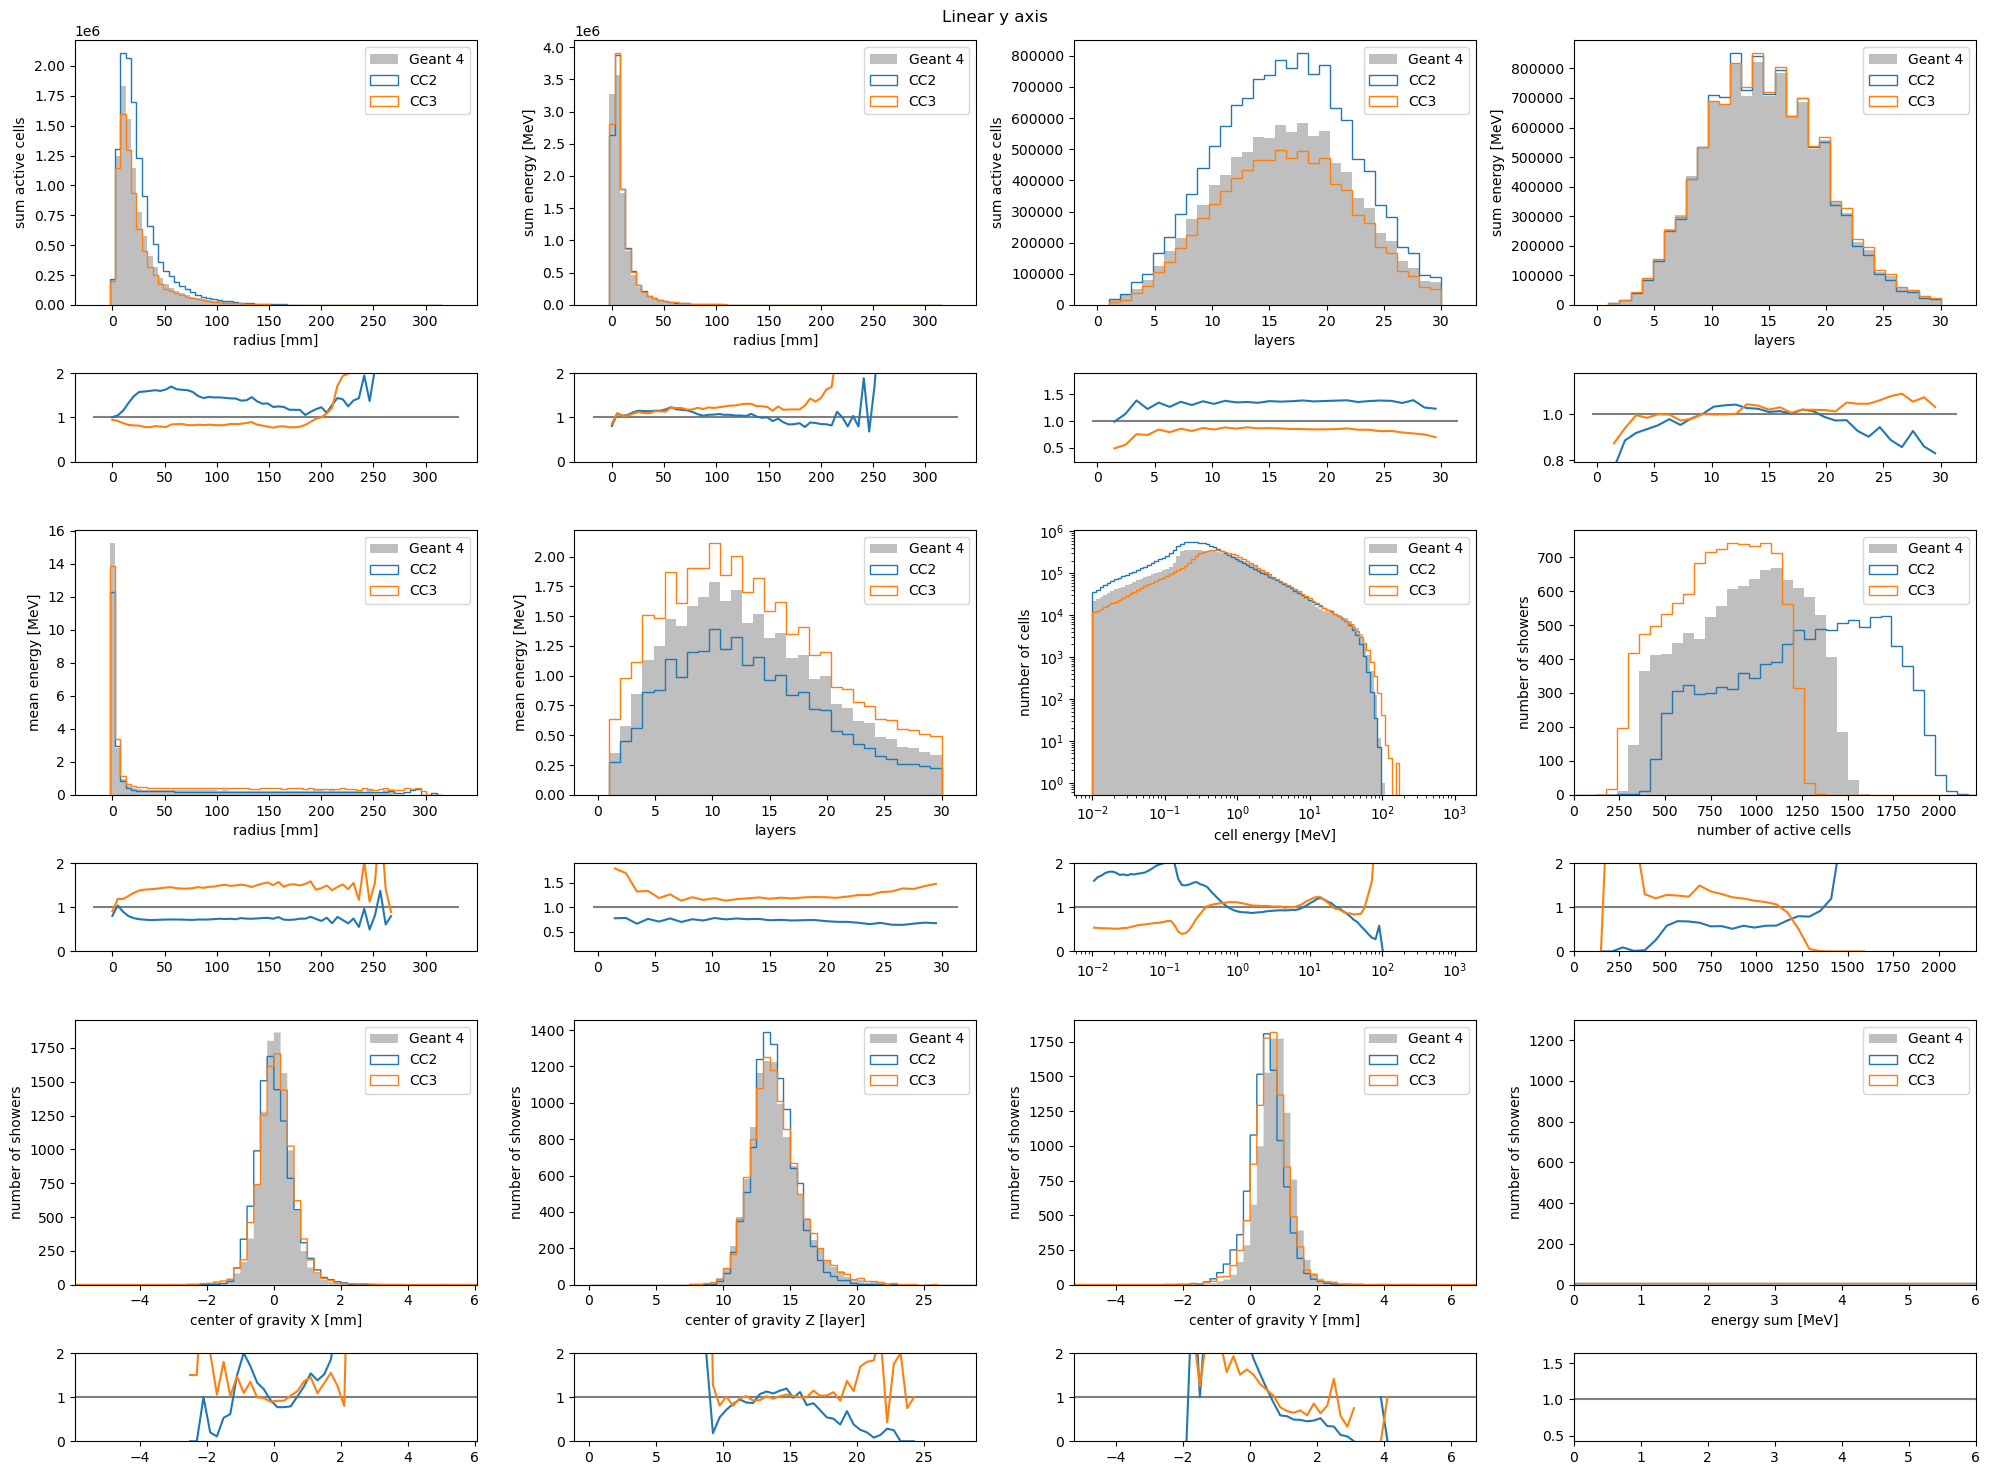

In [ ]:
make_hist_plots(binned_g4_proj, to_compare_proj)

Now, CC2 and CC3 have different scale factors for matching the hits and energy deposited in cells to the true energy or hits.

In [ ]:
reduced = {k:to_compare_proj[k] for k in ["CC2", "CC3"]}

make_hist_plots(binned_g4_proj, reduced, save_tag="detectorProj")